In [1]:
import sys
sys.path.append('../')

import torch
from torch.utils.data import DataLoader
from torchvision import transforms
from torchvision import datasets
from torch.utils.data import SubsetRandomSampler
import numpy as np
import random

import numpy as np
import pandas as pd
import os
import glob
import tqdm
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
import sklearn

from torch.utils.data import DataLoader, Dataset
from torchvision import datasets, transforms
from torch.utils.data.sampler import SubsetRandomSampler
import numpy as np

from PIL import ImageFilter
from PIL import Image

eps = np.finfo(float).eps

plt.rcParams['figure.figsize'] = 10, 10
%matplotlib inline

from models import *
from utils import *
from data import *

%load_ext autoreload
%autoreload 2

In [2]:
# Enable CUDA, set tensor type and device
use_cuda = False
if use_cuda:
    dtype = torch.cuda.FloatTensor
    device = torch.device("cuda")
    torch.cuda.set_device(0)
    print('GPU')
else:
    dtype = torch.FloatTensor
    device = torch.device("cpu")

In [3]:

in_channels = 3
# Get train and test loaders for dataset
train_transforms = cifar_train_transforms()
test_transforms = cifar_test_transforms()


loader = Loader('CIFAR10C', '../data', True, 32, train_transforms, test_transforms, None, use_cuda)
train_loader = loader.train_loader
test_loader = loader.test_loader

Files already downloaded and verified
Files already downloaded and verified


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


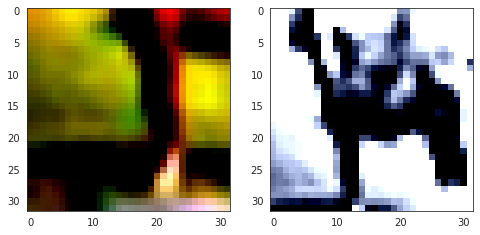

In [24]:
# xi, xj, _ = next(iter(test_loader))

xi, xj, _ = train_loader.__iter__().__next__()

def tensor2im(x, ind=0):
    im_tensor = x[ind].squeeze(0)
    im = np.transpose(im_tensor.numpy(), (1, 2, 0))
    return im

im_xi = tensor2im(xi, 4)
im_xj = tensor2im(xj, 4)

plt.rcParams['figure.figsize'] = 8, 8
with sns.axes_style('white'):
    fig, axis = plt.subplots(nrows=1, ncols=2)
    
    axis[0].imshow(im_xi)
    axis[0].set_title('')
    
    axis[1].imshow(im_xj)
    axis[1].set_title('')
